## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [83]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data


from sklearn.metrics import (
     f1_score,
     accuracy_score,
     recall_score,
     precision_score,
     confusion_matrix,
     roc_auc_score,
     confusion_matrix,
 )

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [84]:
# uncomment and run the following lines for Google Colab
#from google.colab import drive


#from google.colab import drive
#drive.mount('/content/drive')

## Loading the dataset

In [85]:
churn = pd.read_csv("BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [86]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

(10127, 21)

- The dataset has 10127 rows and 21 columns.

In [90]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [91]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [92]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [93]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- 15 are numerical
- 6 are object types
2 columns have less than 10127 non-null values i.e columns have missing values.

### Checking for duplicate values

In [94]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

### Checking for missing values

In [95]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [96]:
round(data.isnull().sum() / data.isnull().count()*100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

- Education_Level column has 15% (1519 records) missing values out of the total observations
- Marital-Status column has 7% (749 records) missing values out of the total observations

### Statistical summary of the dataset

In [97]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


##Observations
- CLIENTNUM: CLIENTNUM is being a unique identifier doesn't add meaning to the analysis and can be dropped.
- Total_Amt_Chng_Q4_Q1: Since the value of total amount change Q4 over Q1 is normalized a 0.76 average value indicates that most of the data we have is from potential customer  with considerable transaction count Transaction Amount.
- Total_Ct_Chng_Q4_Q1: Since the value of total amount change Q4 over Q1 is normalized a 0.23 average value indicates that most of the data we have is from potential customer  with considerable transaction count
- CreditLimit has a wide range from 9088.777 to 34516 dollars
- Total_Trans_Amt has a wide range from 510.0 to 18484 dollars.


In [98]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436



- Mode of each unique value in each categorical colum:
   - For Attrition_Flag it is value = 2 with occurences of 8500
   - For Education_Level it is value = 6 with occurences of 3128
   - For Marital_Status it is value = 3 with occurences of 4687
   - For Income_Category it is value = 6 with occurences of 3561
   - For Gender it is value = 2 with occurences of 5358
   - For Card_Category it is value = 4 with occurences of 9436

#### Number of occurences of each unique value in each categorical colum:

In [99]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

#### We should handle value 'abc' within Income_Category.

In [100]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [101]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [102]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [103]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [105]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

In [106]:
df1 = data.copy()

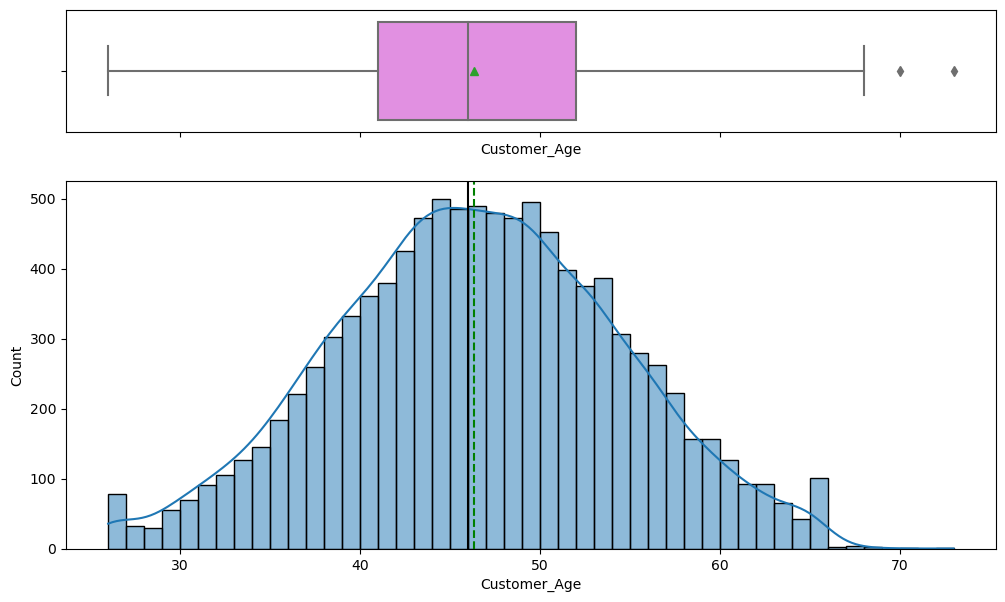

In [107]:
histogram_boxplot(df1, "Customer_Age", kde=True)

- Customer_Age doess not have any outlier
- 50% of people have age less than 47 years old
- Distribution of Customer_Age is pretty normal

`Months_on_book`

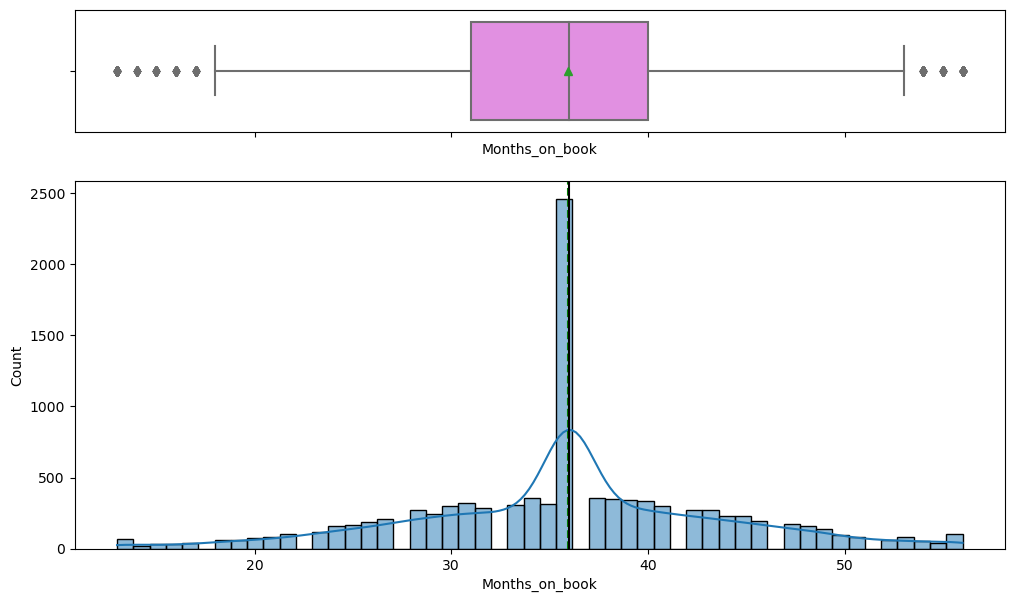

In [108]:
histogram_boxplot(df1, "Months_on_book", kde=True)  ## Complete the code to create histogram_boxplot for 'Months_on_book'

- Months_on_book have outliers.
- Its distribution also we can say looks like a sinusii=oid bellshape. Mirorong nomal distribution.

`Credit_Limit`

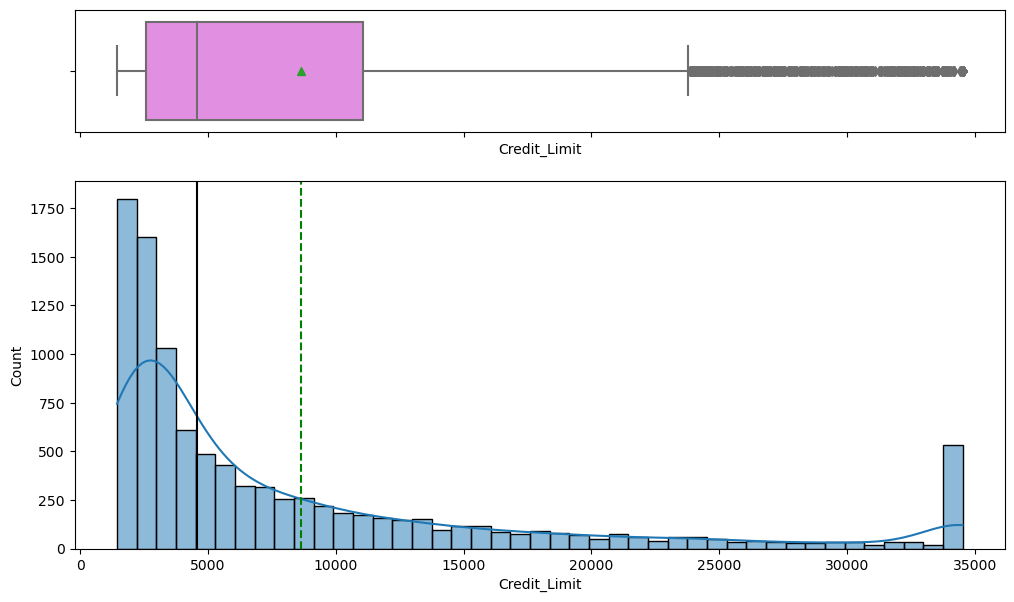

In [109]:
histogram_boxplot(df1, "Credit_Limit", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

- Credi_Limit boxplot has outliers for values over 25 000 dollars
- Credit_Limit distribution is right skewed.



`Total_Revolving_Bal`

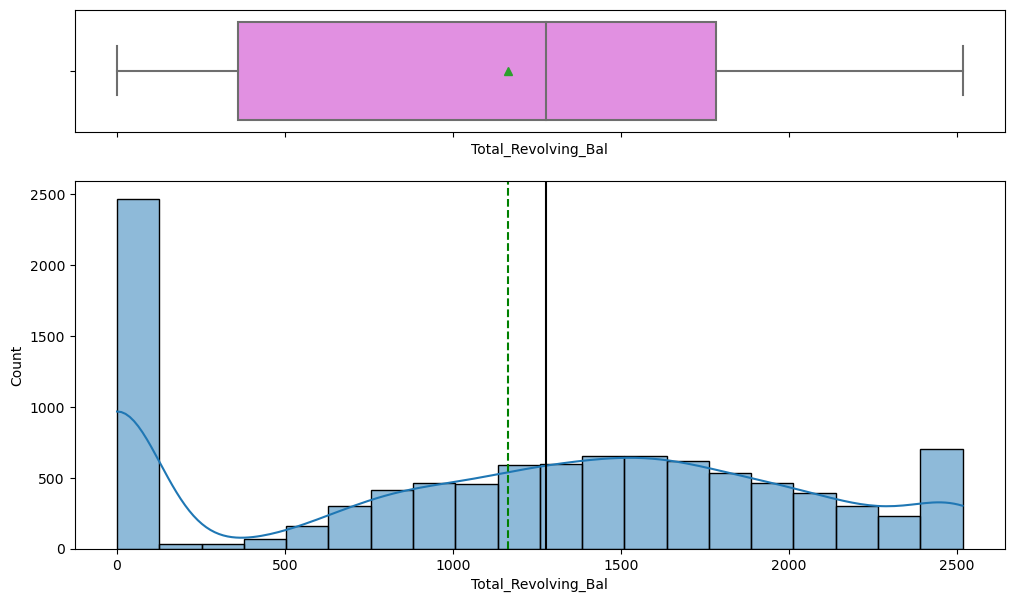

In [110]:
histogram_boxplot(df1, "Total_Revolving_Bal", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

- Total_Revolving_Bal does not have outliers
- Total_Revolving_Bal distribution is almost normal.

`Avg_Open_To_Buy`

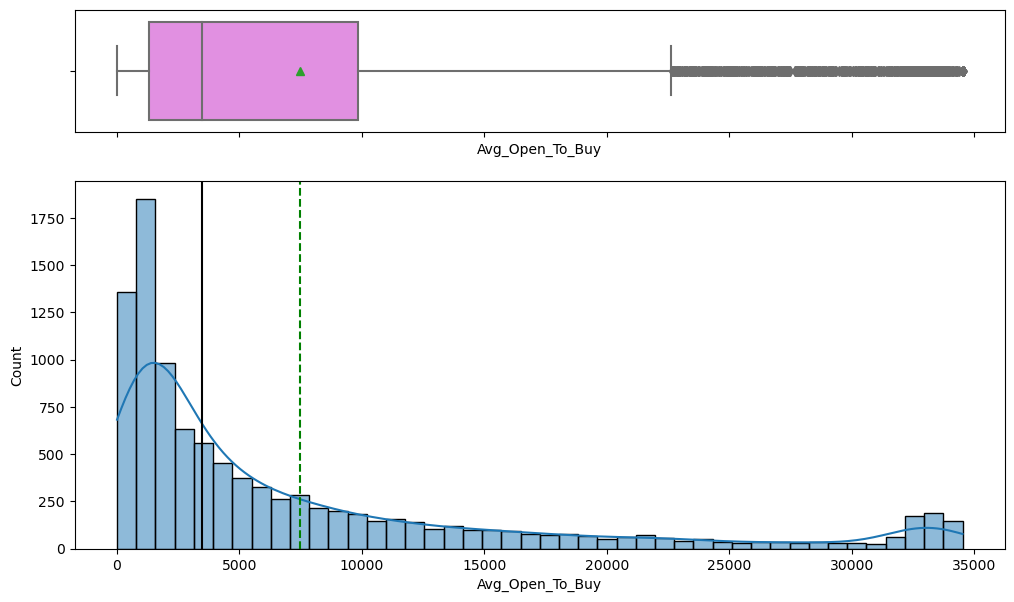

In [111]:
histogram_boxplot(df1, "Avg_Open_To_Buy", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

- Avg_Open_To_Buy boxplot has outliers
- Avg_Open_To_Buy distribution is right skewed

`Total_Trans_Ct`

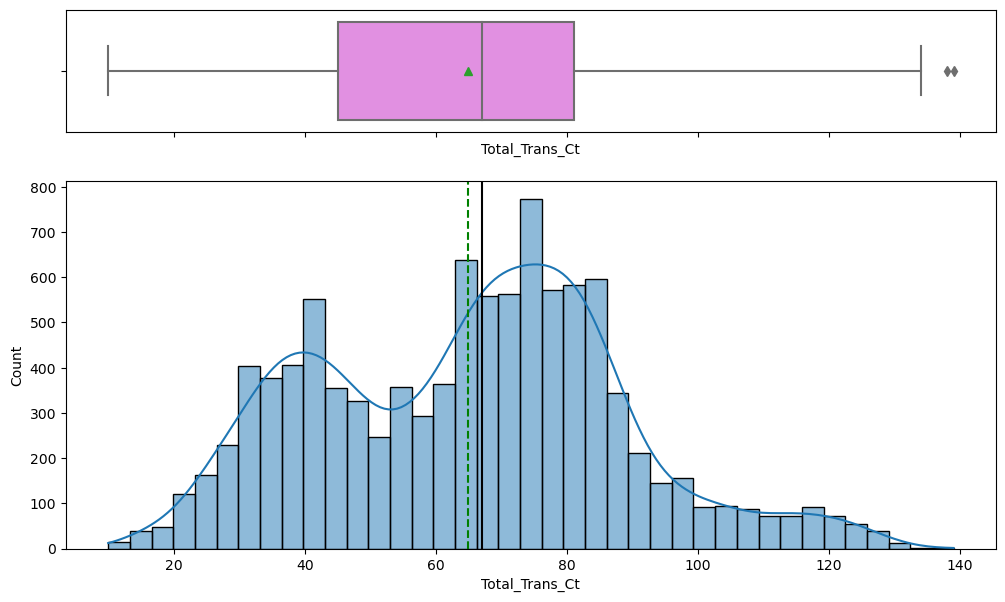

In [112]:
histogram_boxplot(df1, "Total_Trans_Ct", kde=True)  ## Complete the code to create histogram_boxplot for 'Total_Trans_Ct'

`Total_Amt_Chng_Q4_Q1`

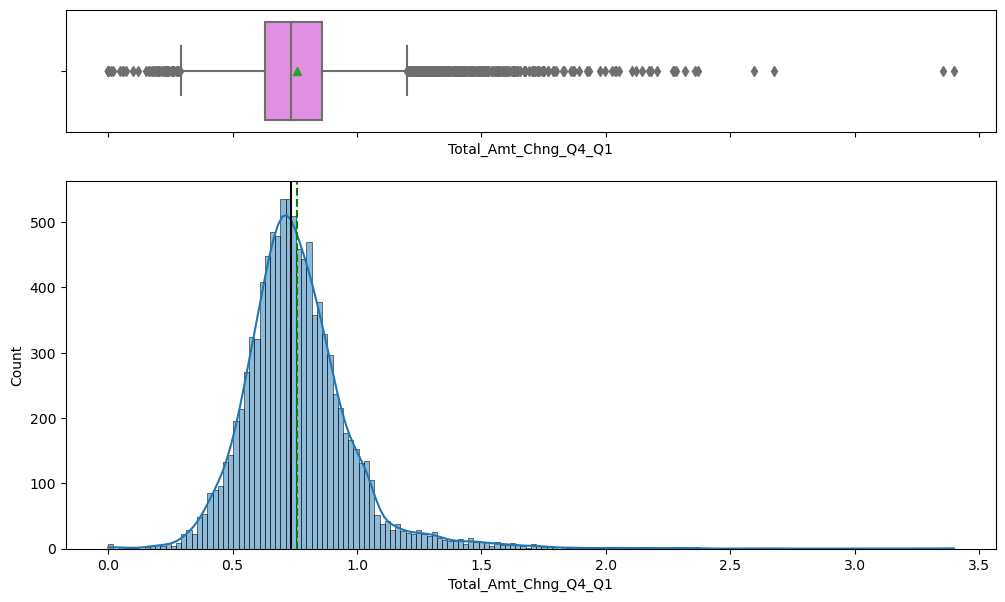

In [113]:
histogram_boxplot(df1, "Total_Amt_Chng_Q4_Q1", kde=True)  ## Complete the code to create histogram_boxplot for 'Total_Amt_Chng_Q4_Q1'

**Let's see total transaction amount dis**

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

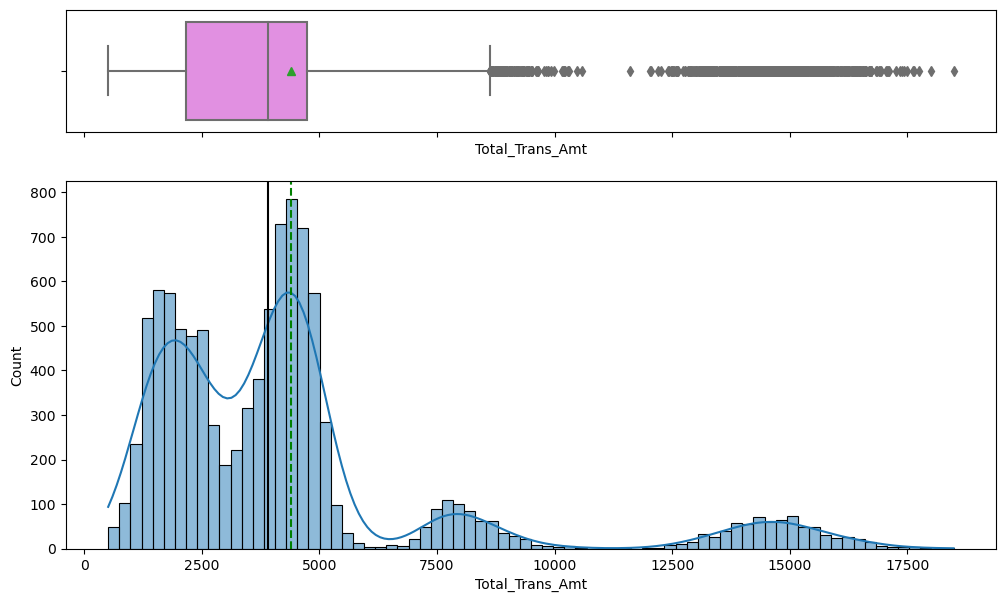

In [30]:
histogram_boxplot(df1, "Total_Trans_Amt", kde=True)  ## Complete the code to create histogram_boxplot for 'Total_Trans_Amt'

`Total_Ct_Chng_Q4_Q1`

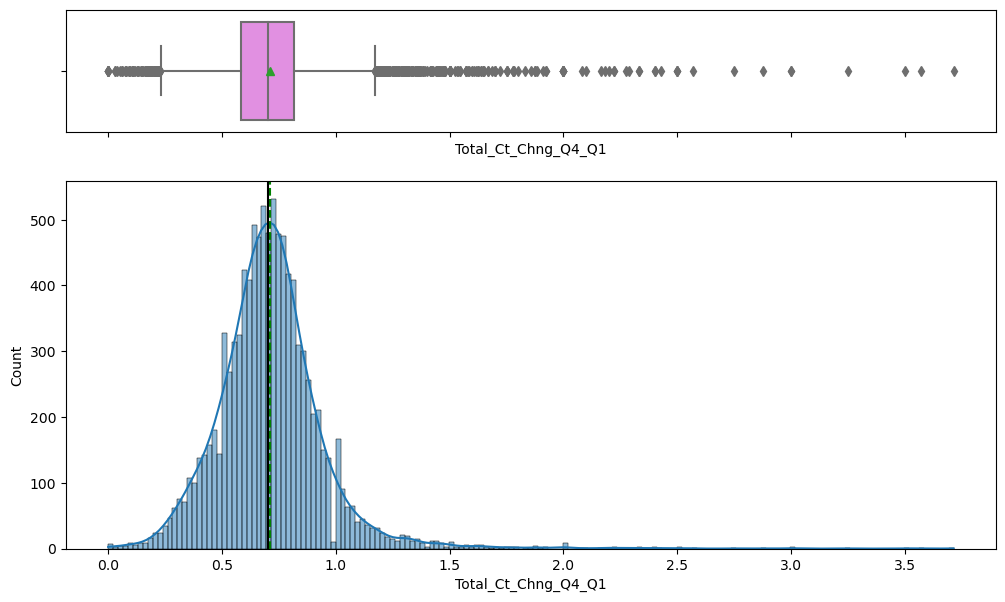

In [31]:
histogram_boxplot(df1, "Total_Ct_Chng_Q4_Q1", kde=True)  ## Complete the code to create histogram_boxplot for 'Total_Ct_Chng_Q4_Q1'

`Avg_Utilization_Ratio`

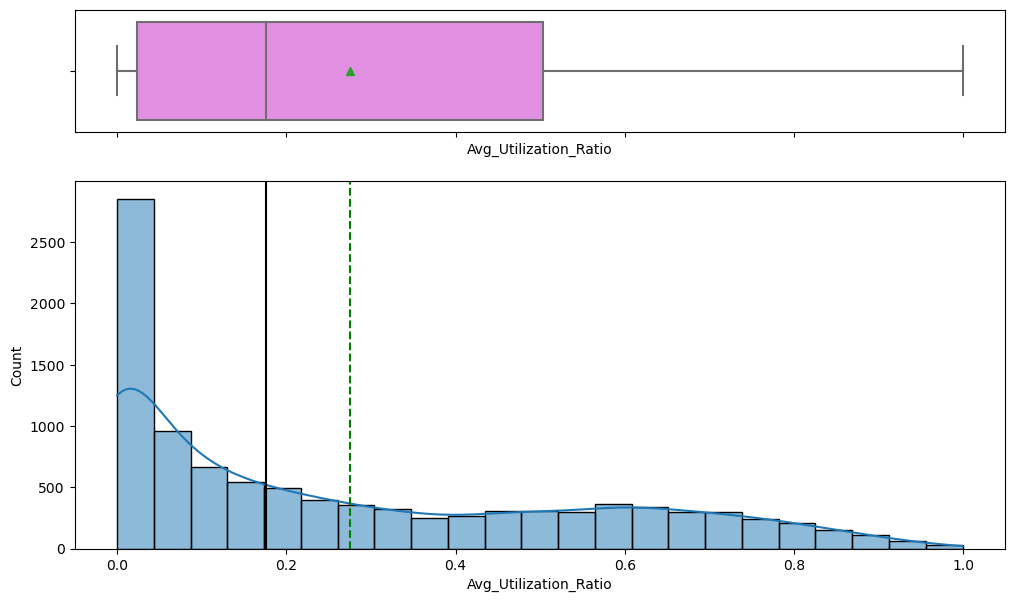

In [32]:
histogram_boxplot(df1, "Avg_Utilization_Ratio", kde=True)  ## Complete the code to create histogram_boxplot for 'Avg_Utilization_Ratio'

`Dependent_count`

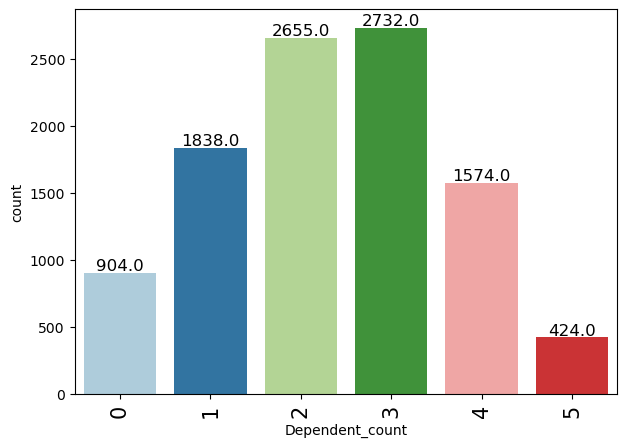

In [33]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

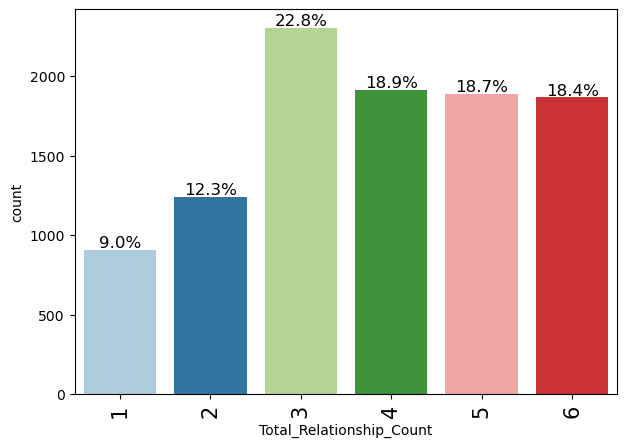

In [34]:
labeled_barplot(df1, "Total_Relationship_Count", perc=True) ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

`Months_Inactive_12_mon`

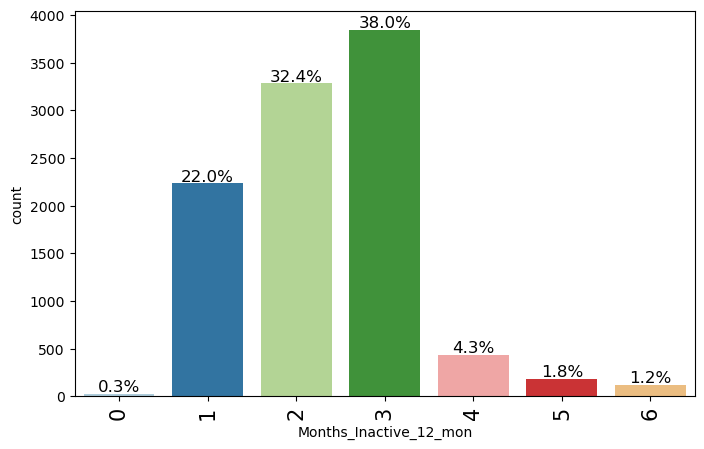

In [35]:
labeled_barplot(df1, "Months_Inactive_12_mon", perc=True) ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

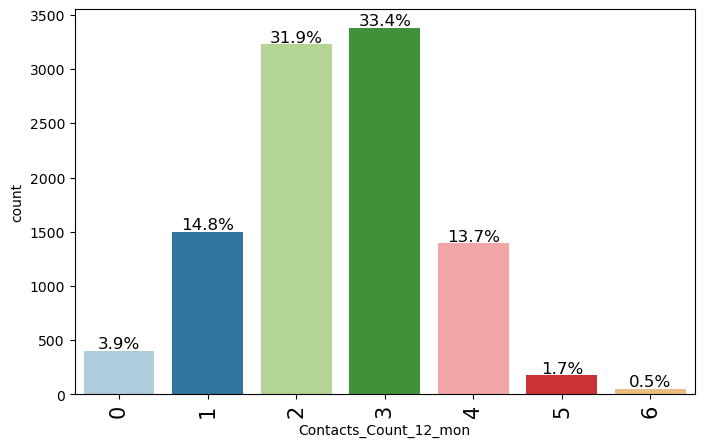

In [36]:
labeled_barplot(df1, "Contacts_Count_12_mon", perc=True) ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'""

`Gender`

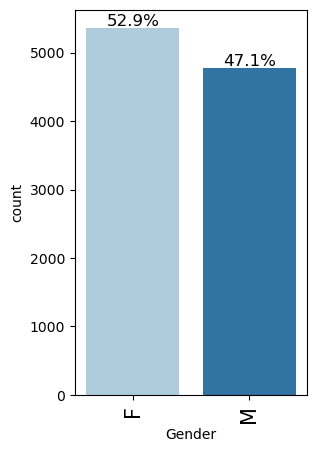

In [37]:
labeled_barplot(df1, "Gender", perc=True) ## Complete the code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

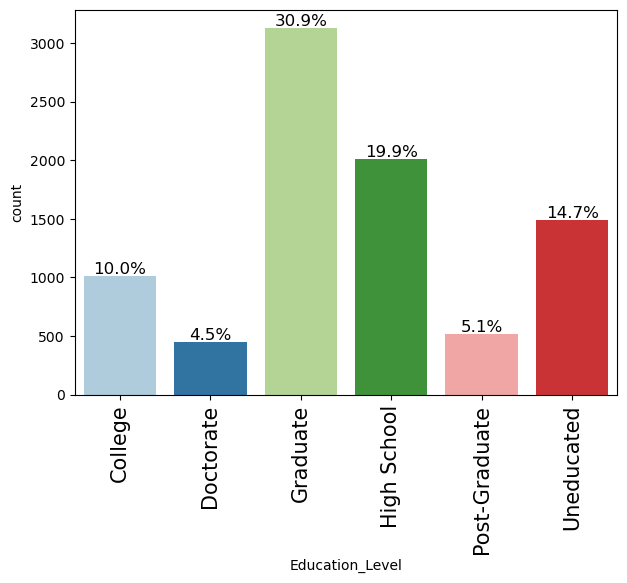

In [38]:
labeled_barplot(df1, "Education_Level", perc=True) ## Complete the code to create labeled_barplot for 'Education_Level'

`Marital_Status`

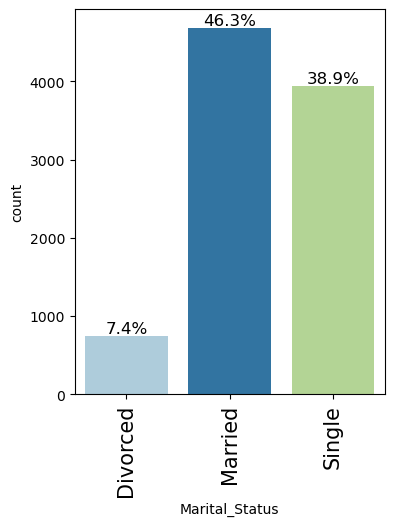

In [39]:
labeled_barplot(df1, "Marital_Status", perc=True) ## Complete the code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

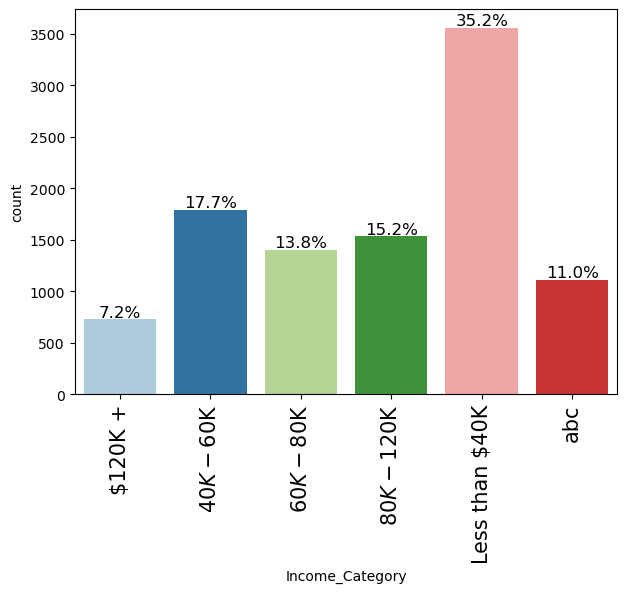

In [40]:
labeled_barplot(df1, "Income_Category", perc=True) ## Complete the code to create labeled_barplot for 'Income_Category'

`Card_Category`

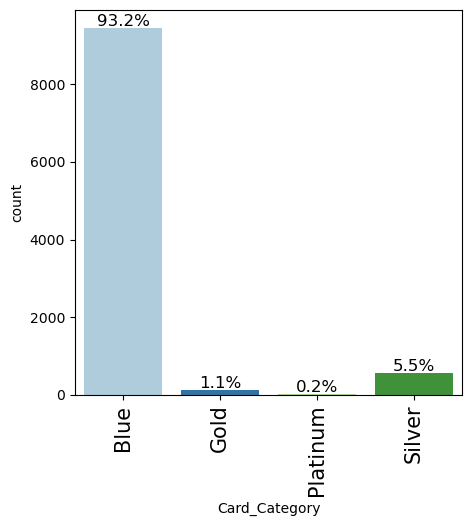

In [41]:
labeled_barplot(df1, "Card_Category", perc=True) ## Complete the code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

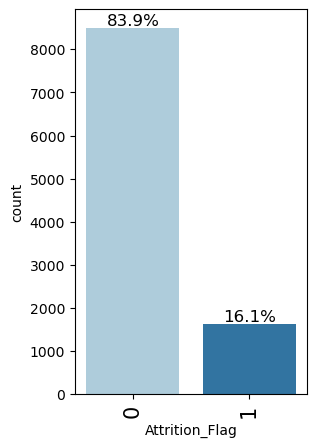

In [42]:
labeled_barplot(df1, "Attrition_Flag", perc=True) ## Complete the code to create labeled_barplot for 'Attrition_Flag'

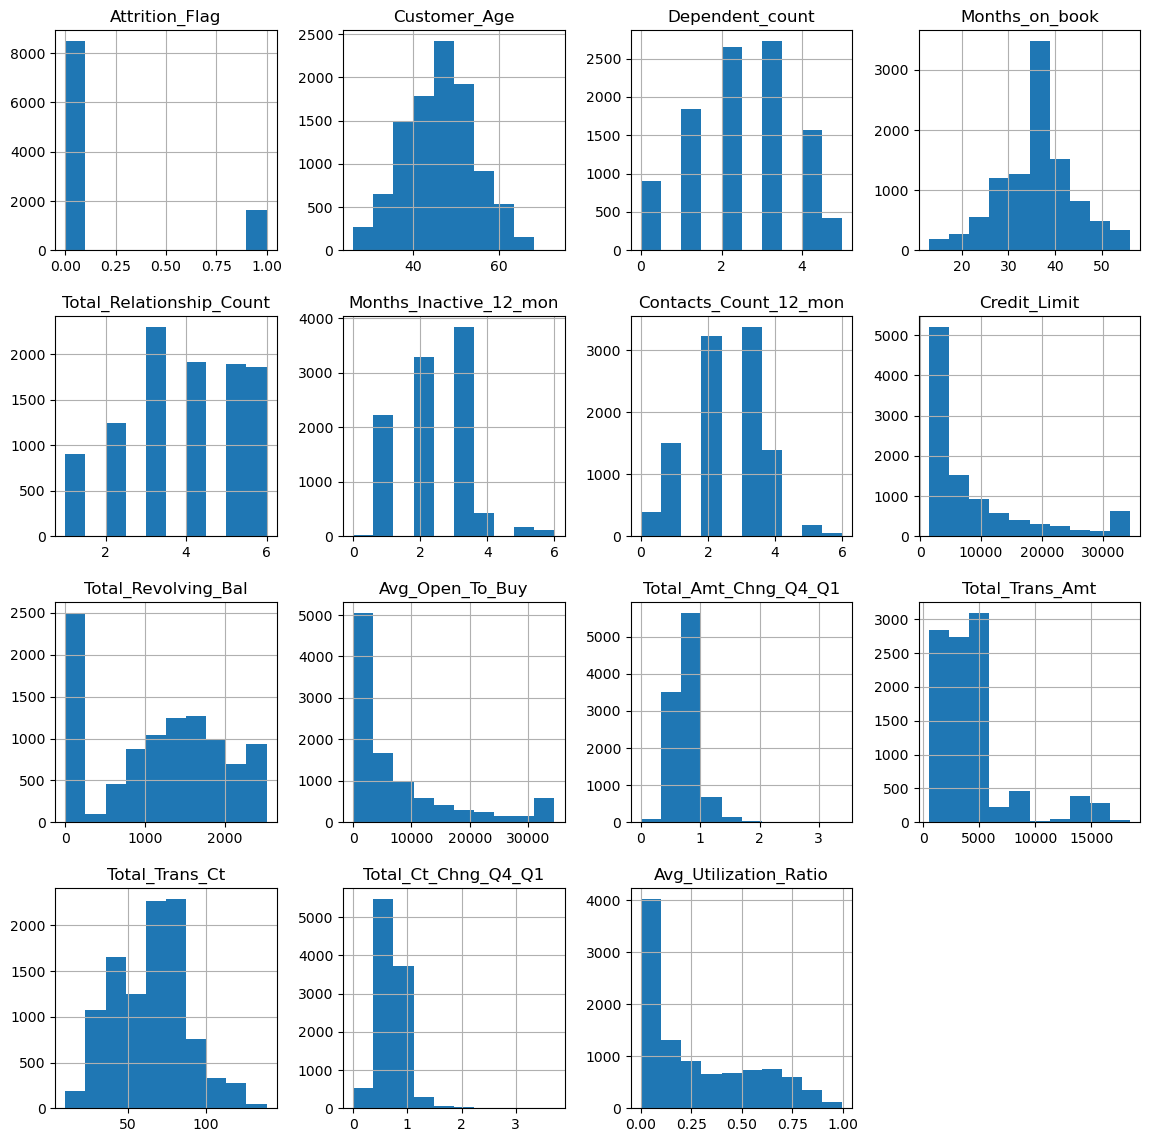

In [43]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

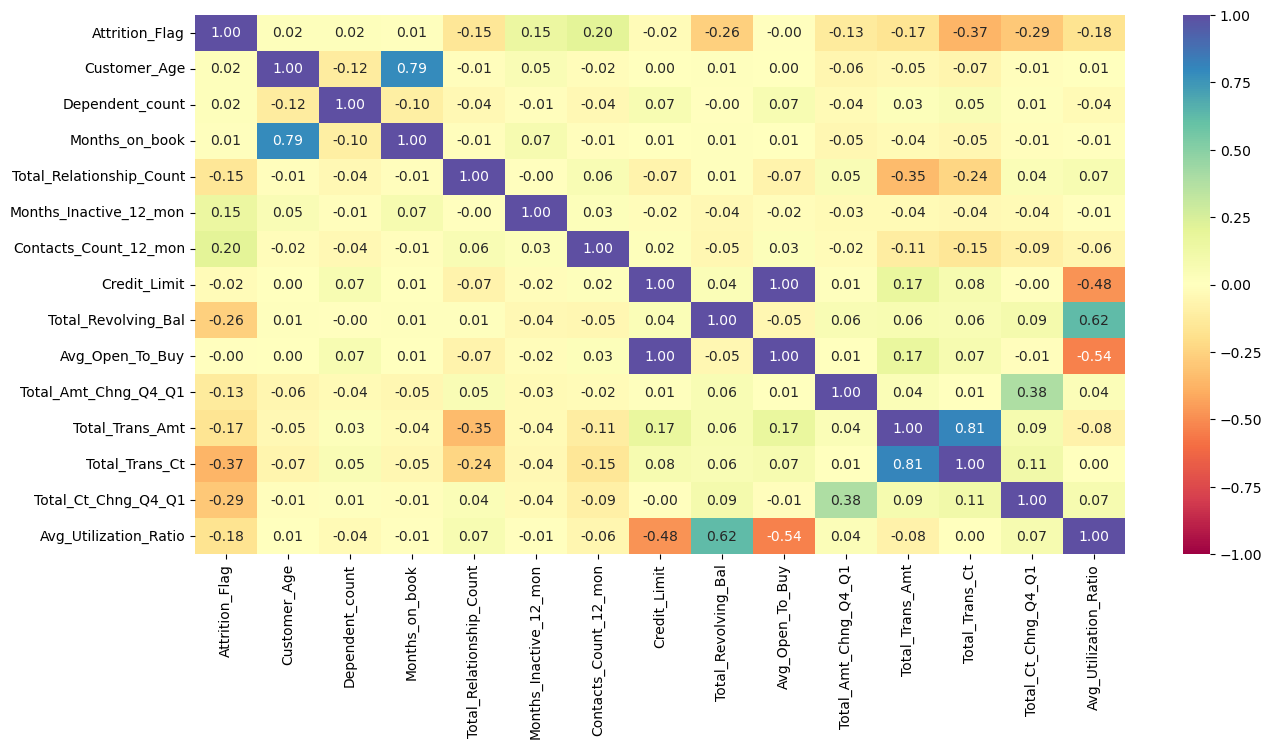

In [44]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Customer_Age and Months_on_book are highly correlated.
- Total_Revolving_Bal and Avg_Utilization_Ration are moderately corelated.
- Average_Open_To_Buy and Avg_utilzation ration are negatively correlated.
- Credit_Limit and Avg_Utilization_Ratio are moderately negatively correlated.

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


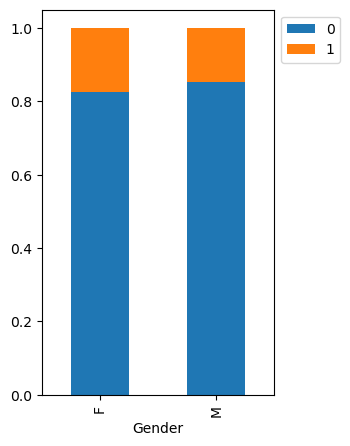

In [45]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


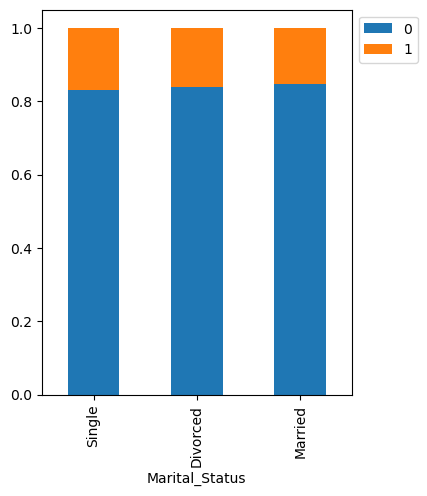

In [46]:
stacked_barplot(data,"Marital_Status", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


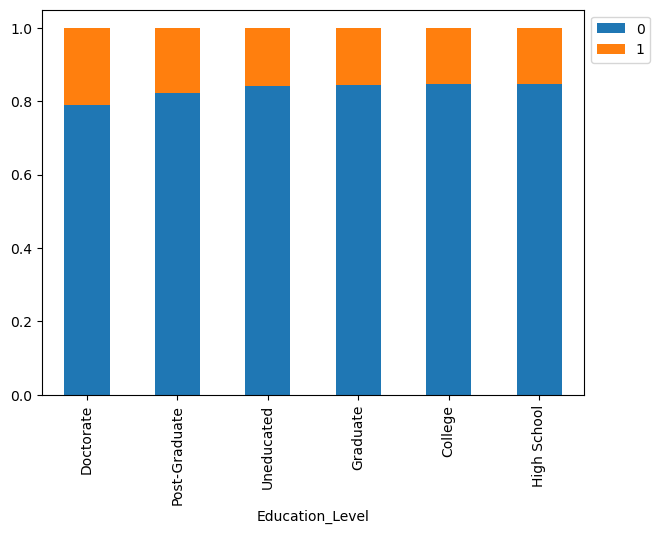

In [47]:
stacked_barplot(data,"Education_Level", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


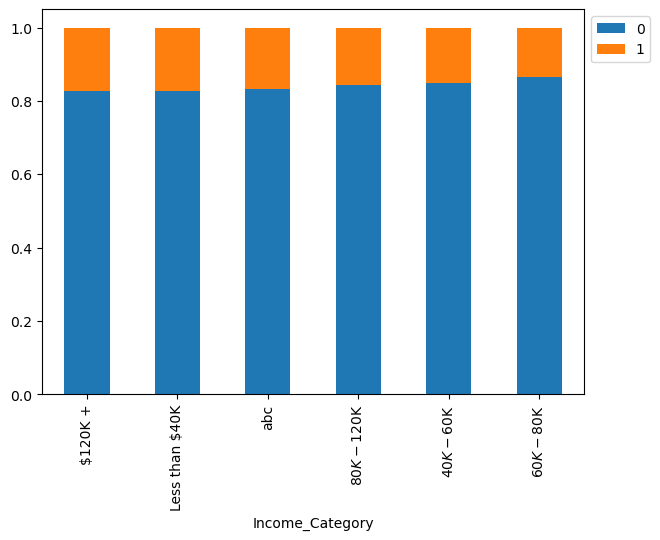

In [48]:
stacked_barplot(data,"Income_Category", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


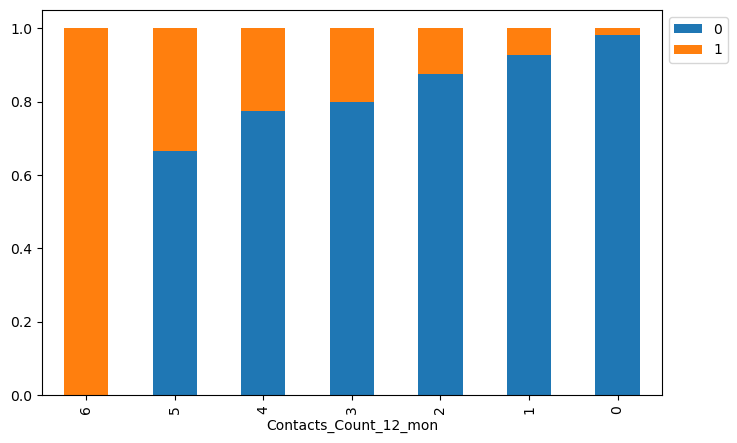

In [49]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


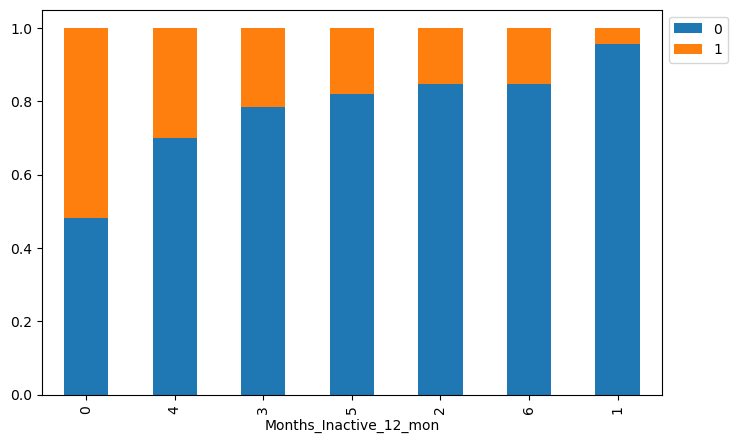

In [50]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


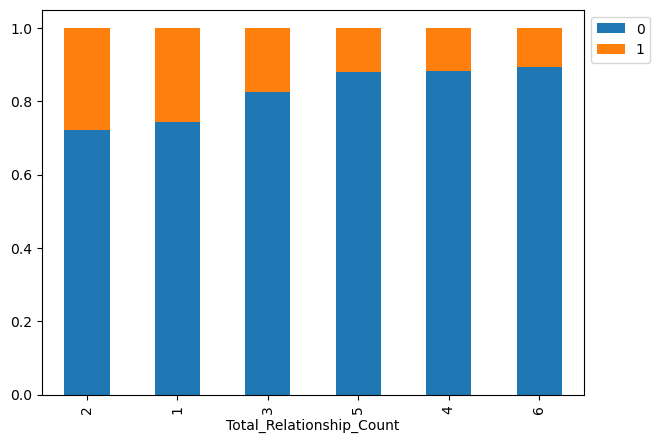

In [51]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


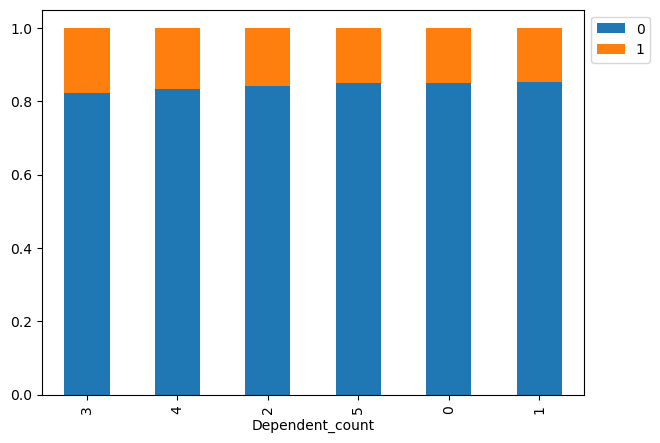

In [52]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

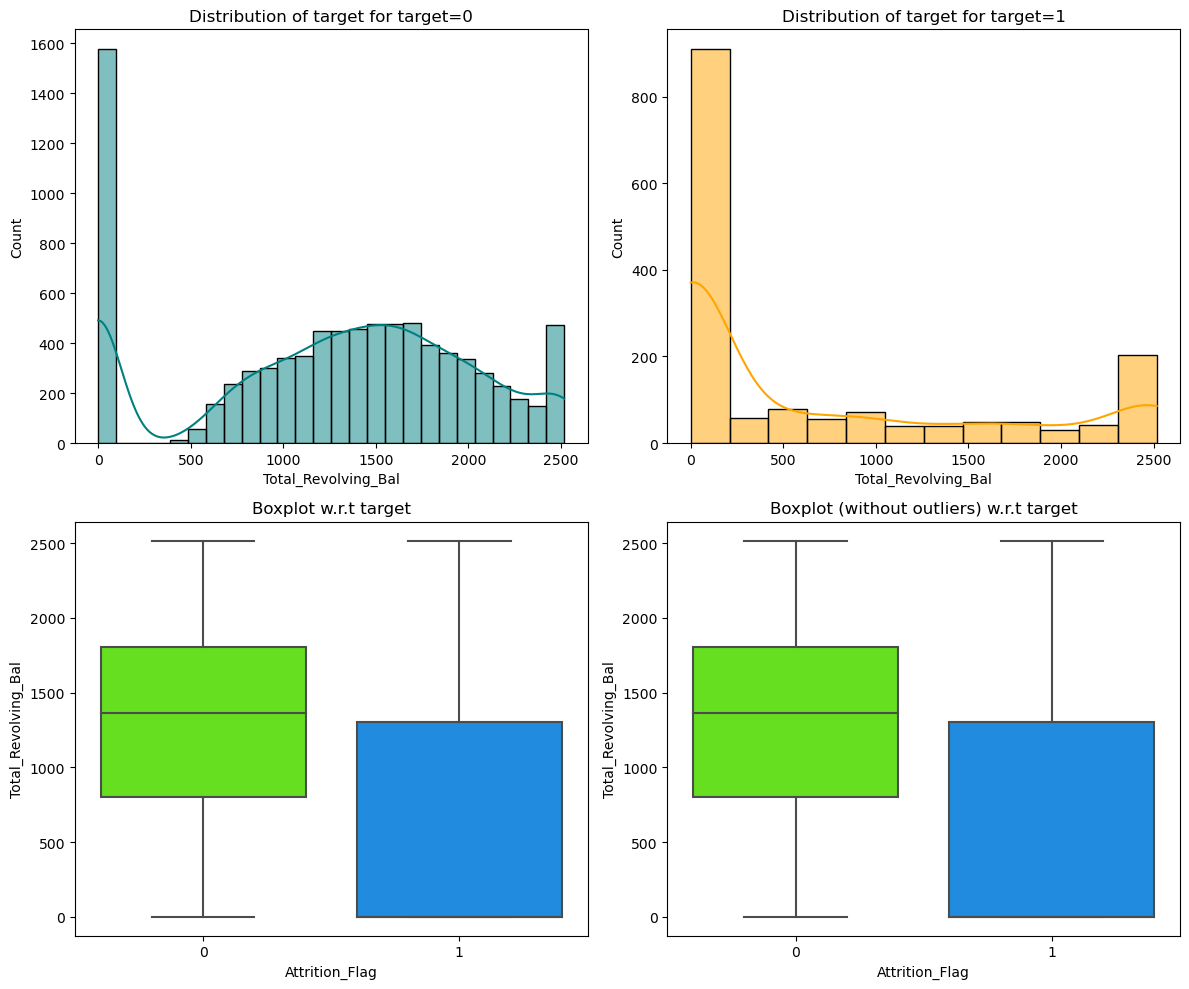

In [53]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

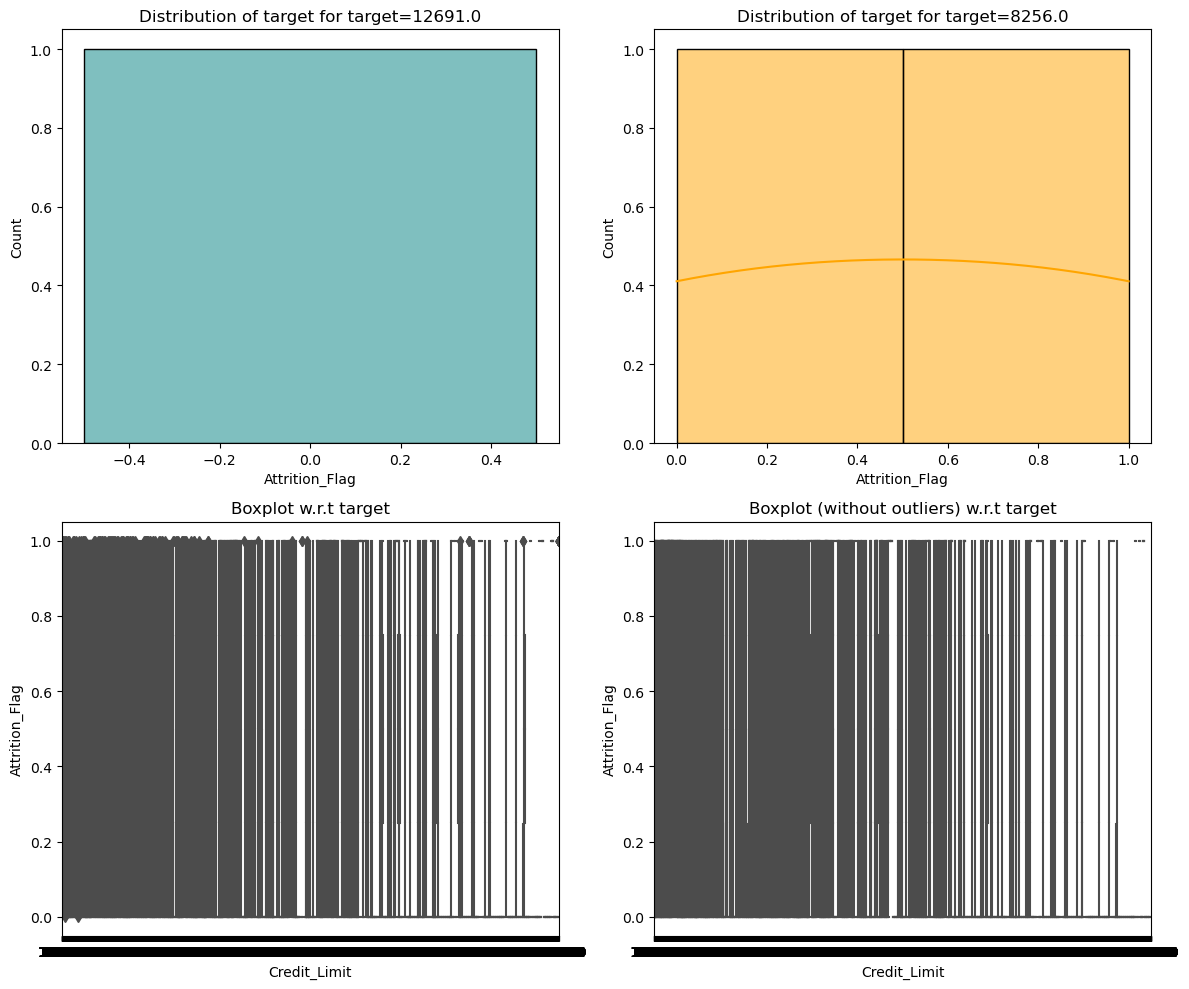

In [54]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Credit_Limit") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

`Attrition_Flag vs Customer_Age`

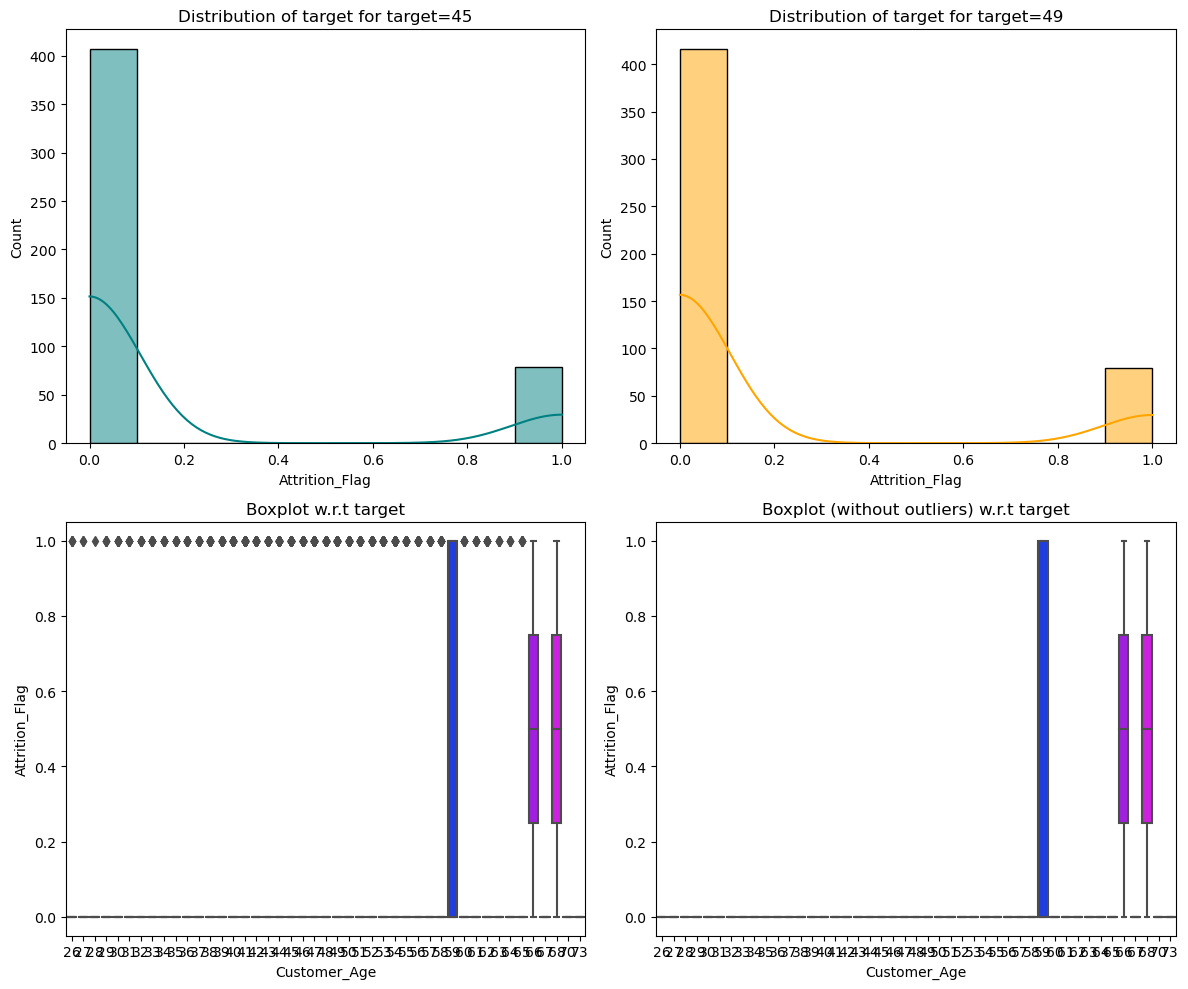

In [55]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Customer_Age") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

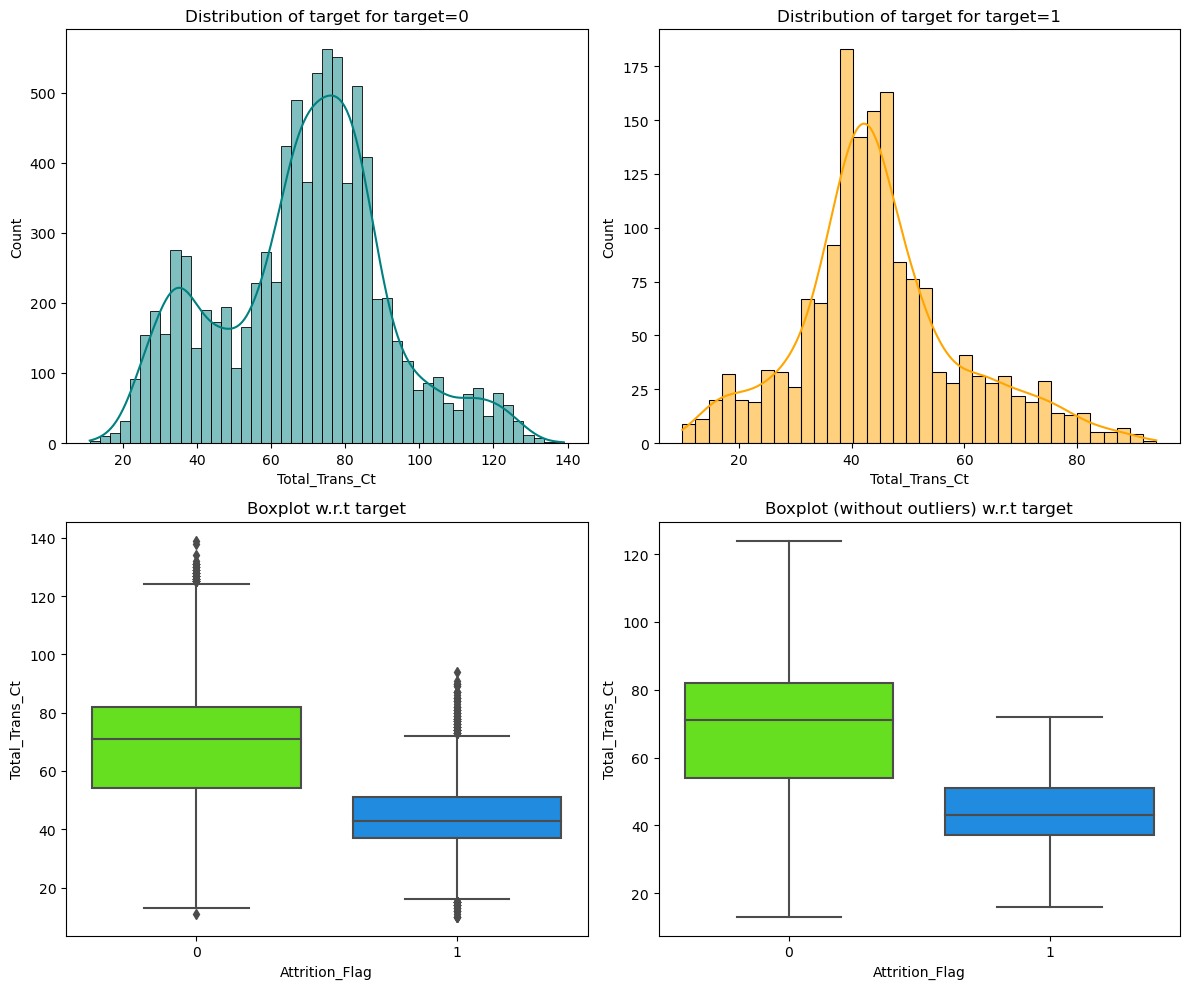

In [56]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

`Total_Trans_Amt` vs `Attrition_Flag`

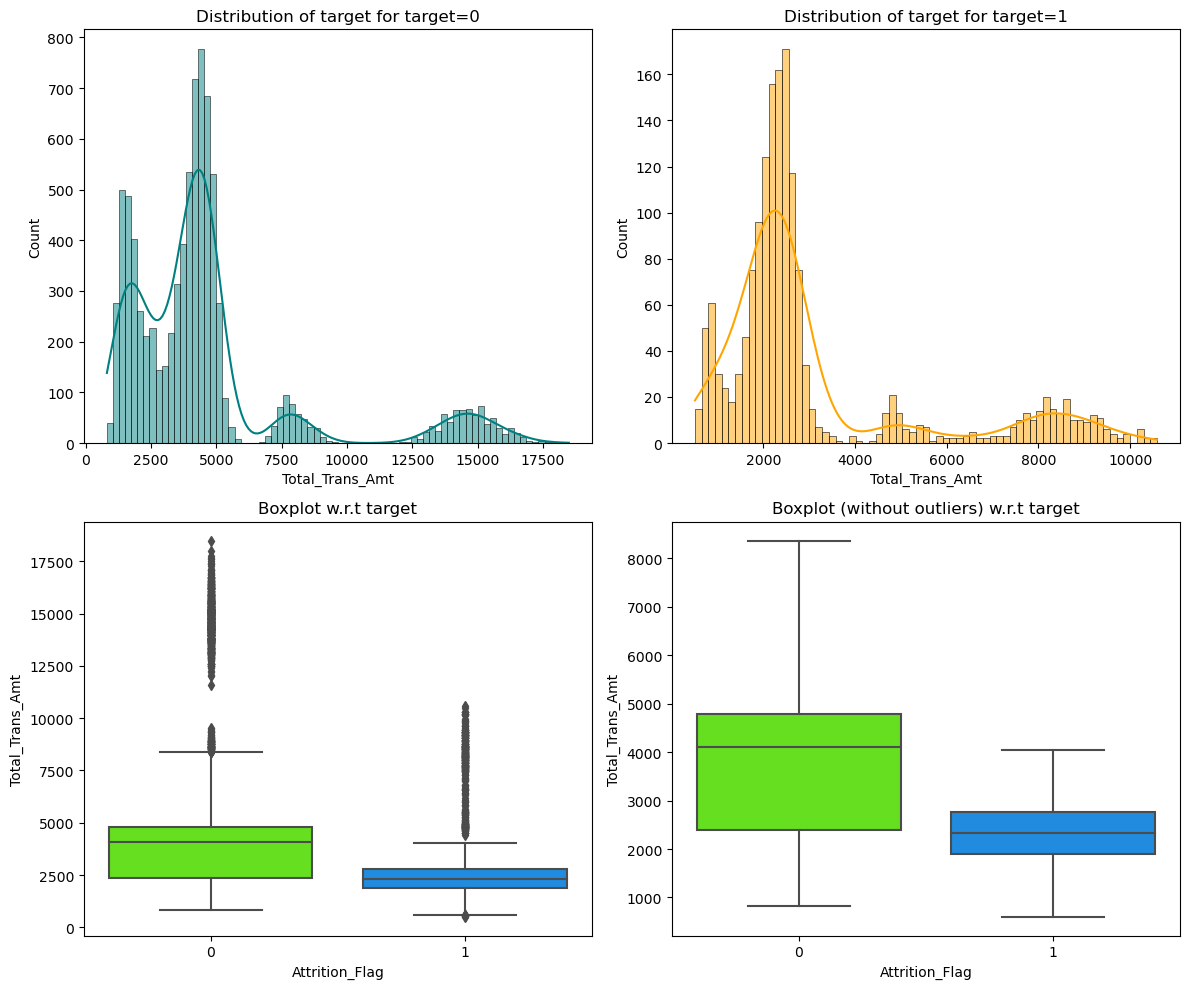

In [57]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

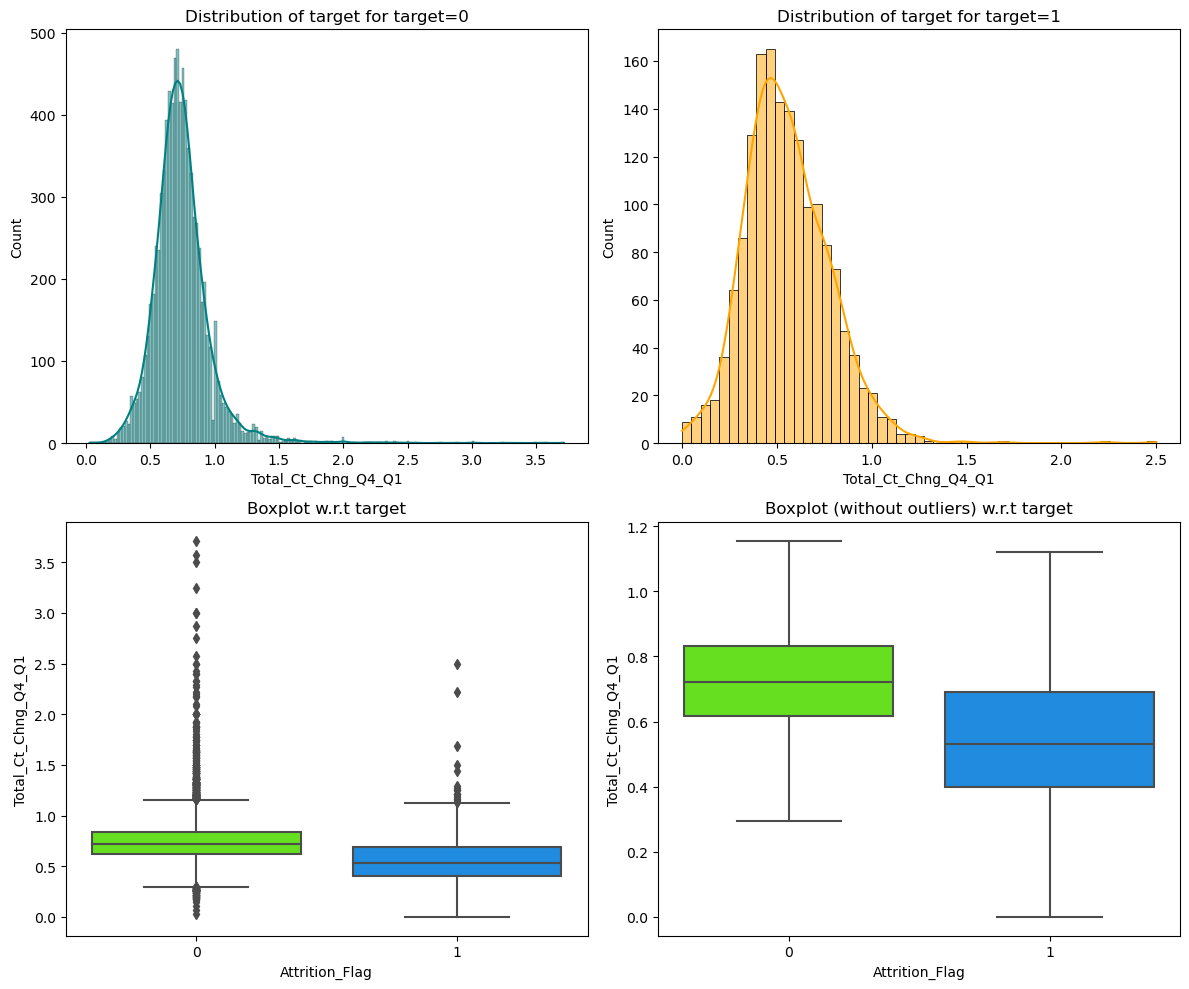

In [58]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

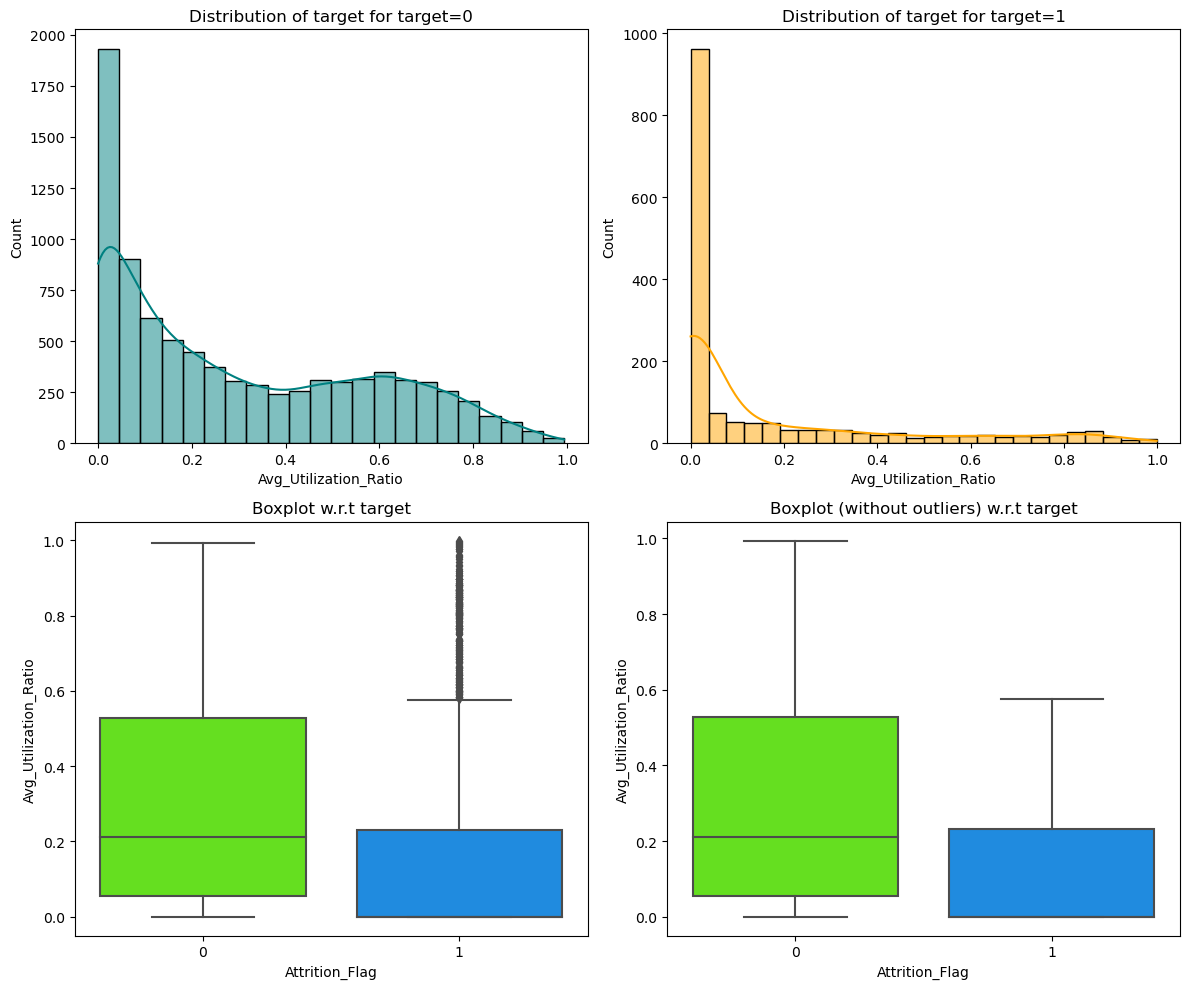

In [59]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

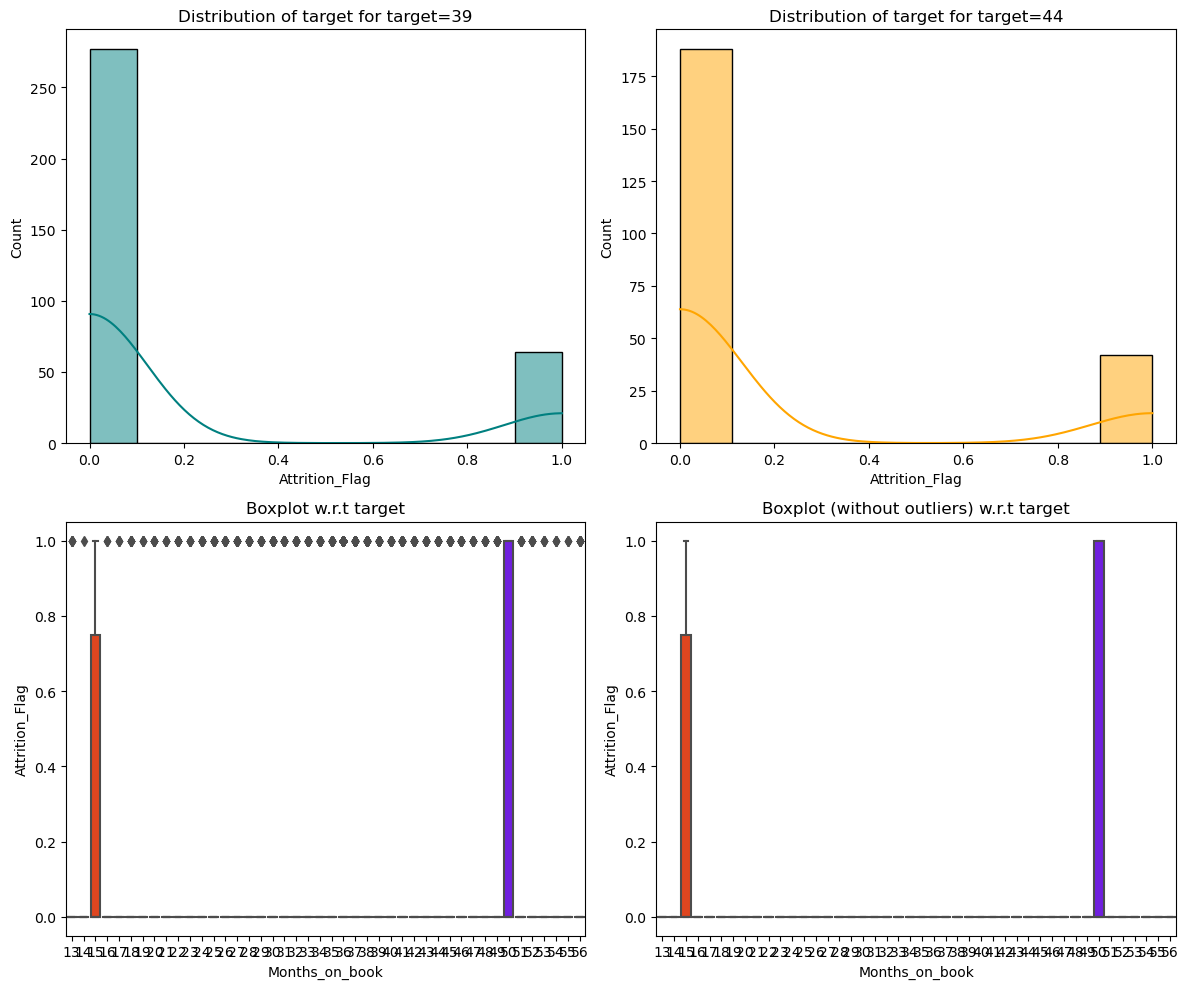

In [60]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Months_on_book") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

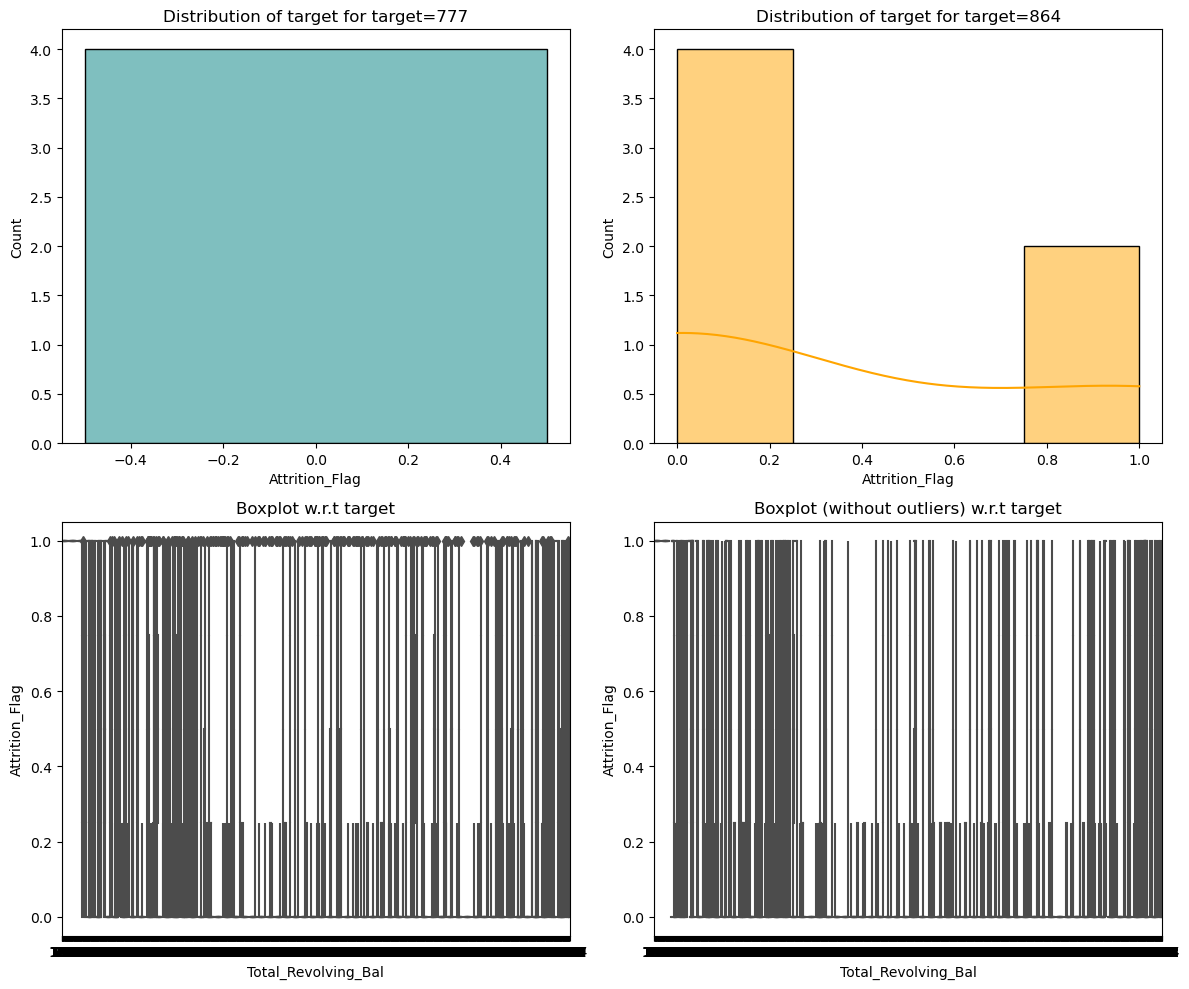

In [61]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Revolving_Bal") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

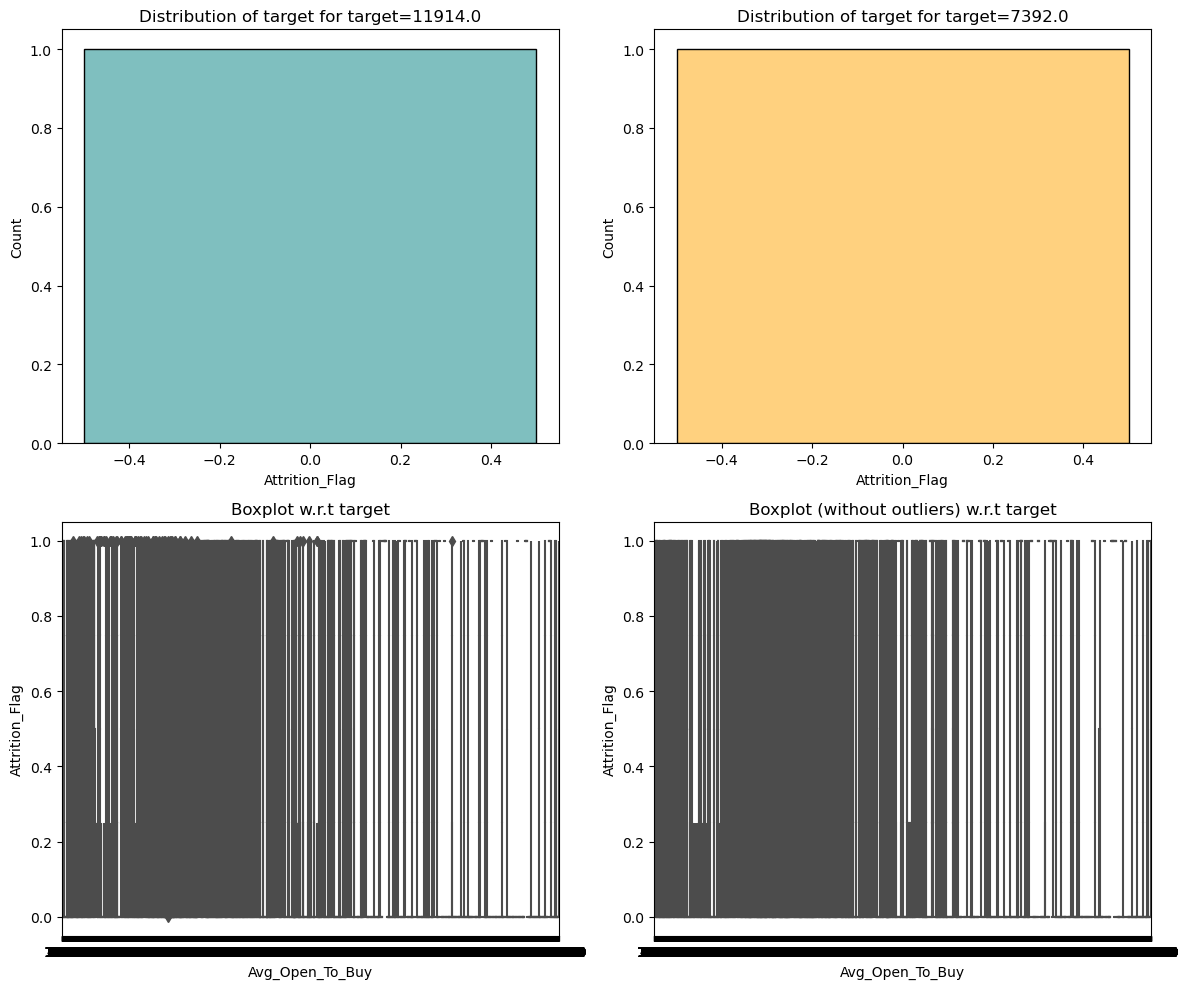

In [62]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Avg_Open_To_Buy") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [63]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [64]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

In [65]:

#Libration to visualize missing values
import missingno as msn

### Train-Test Split

In [66]:
# creating the copy of the dataframe
data1 = data.copy()

In [67]:
#msn.matrix(data1)

In [68]:
data1[data1["Income_Category"] == "abc"]


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,0,45,F,2,Graduate,Married,abc,Blue,37,6,1,2,14470.000,1157,13313.000,0.966,1207,21,0.909,0.080
28,0,44,F,3,Uneducated,Single,abc,Blue,34,5,2,2,10100.000,0,10100.000,0.525,1052,18,1.571,0.000
39,1,66,F,0,Doctorate,Married,abc,Blue,56,5,4,3,7882.000,605,7277.000,1.052,704,16,0.143,0.077
44,0,38,F,4,Graduate,Single,abc,Blue,28,2,3,3,9830.000,2055,7775.000,0.977,1042,23,0.917,0.209
58,0,44,F,5,Graduate,Married,abc,Blue,35,4,1,2,6273.000,978,5295.000,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,1,30,F,1,Graduate,Married,abc,Blue,18,4,1,4,4377.000,2517,1860.000,0.941,8759,74,0.609,0.575
10040,1,50,F,3,Doctorate,Single,abc,Blue,36,4,3,3,5173.000,0,5173.000,0.912,8757,68,0.789,0.000
10083,0,42,F,4,Uneducated,Married,abc,Blue,23,4,1,2,8348.000,0,8348.000,0.695,15905,111,0.708,0.000
10092,1,40,F,3,Graduate,Married,abc,Blue,25,1,2,3,6888.000,1878,5010.000,1.059,9038,64,0.829,0.273


In [69]:
data1["Income_Category"].replace("abc", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In [70]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [71]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [72]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [73]:
# Splitting data into training and validation set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y) ## Complete the code to split the data into train test in the ratio 80:20

# then we split the temporary set into train and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (406, 19) (1620, 19)


### Missing value imputation

In [74]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [75]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.transform(X_val[reqd_col_for_impute]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])  ## Complete the code to impute missing values in X_test

In [76]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [77]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4288
M    3813
Name: Gender, dtype: int64
******************************
Graduate         3707
High School      1613
Uneducated       1172
College           820
Post-Graduate     422
Doctorate         367
Name: Education_Level, dtype: int64
******************************
Married     4395
Single      3119
Divorced     587
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1247
$60K - $80K       1121
$120K +            573
Name: Income_Category, dtype: int64
******************************
Blue        7548
Silver       443
Gold          93
Platinum      17
Name: Card_Category, dtype: int64
******************************


In [78]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    207
M    199
Name: Gender, dtype: int64
******************************
Graduate         209
High School       74
Uneducated        52
College           37
Post-Graduate     21
Doctorate         13
Name: Education_Level, dtype: int64
******************************
Married     193
Single      167
Divorced     46
Name: Marital_Status, dtype: int64
******************************
Less than $40K    187
$80K - $120K       69
$40K - $60K        62
$60K - $80K        57
$120K +            31
Name: Income_Category, dtype: int64
******************************
Blue        371
Silver       27
Gold          7
Platinum      1
Name: Card_Category, dtype: int64
******************************


In [79]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4288
M    3813
Name: Gender, dtype: int64
******************************
Graduate         3707
High School      1613
Uneducated       1172
College           820
Post-Graduate     422
Doctorate         367
Name: Education_Level, dtype: int64
******************************
Married     4395
Single      3119
Divorced     587
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1247
$60K - $80K       1121
$120K +            573
Name: Income_Category, dtype: int64
******************************
Blue        7548
Silver       443
Gold          93
Platinum      17
Name: Card_Category, dtype: int64
******************************


### Encoding categorical variables

In [80]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True) ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (406, 29) (1620, 29)


* After encoding there are 29 columns.

In [81]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
5298,54,3,36,5,1,4,3666.000,1739,1927.000,0.779,4735,84,0.826,0.474,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4037,53,1,36,3,2,4,4287.000,0,4287.000,0.294,1635,41,0.242,0.000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
33,53,2,38,5,2,3,2650.000,1490,1160.000,1.750,1411,28,1.000,0.562,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4051,51,2,43,6,2,3,2124.000,1426,698.000,0.966,3210,52,0.733,0.671,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
9495,32,0,25,2,3,0,8851.000,1753,7098.000,0.627,14783,110,0.864,0.198,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [82]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
de(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

SyntaxError: invalid syntax (568647349.py, line 2)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))

#### Model Building - Oversampled Data
       - Random forest is overfitting.. It has 1.0 performance in train and .73 in validation
       - dtree is overfitting.. It has 1.0 performance in train and .72 in validation
       - Adaboost performe weel: .86 in train and 0.78 in validation
       - Bagging and GBM are moderately performing weel.
       
#### Training and Validation Performance Difference:

- Bagging: Training Score: 0.9884, Validation Score: 0.8, Difference: 0.1884
- Random forest: Training Score: 1.0, Validation Score: .7384, Difference: 0.2616
- GBM: Training Score: 0.8970, Validation Score: 0.8307, Difference: 0.066
- Adaboost: Training Score: 0.8602, Validation Score: 0.7846, Difference: 0.0756
- dtree: Training Score: 1.0000, Validation Score: 0.7230, Difference: 0.277

- GBM has the best performance followed by Adaboo
       

### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))

### Model Building - Undersampled Data

### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))

#### Summary:

- GBM has the best performance followed by AdaBoost model as per the validation performance

-After building 15 models, it was observed that both the GBM and Adaboost models,
- > trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset,
- > exhibited strong performance on both the training and validation datasets.
- > Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a - > generalized performance

### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 20, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=1, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un, y_train) ## Complete the code to fit the model on undersampled data

In [ ]:
adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train, y_train) ## Complete the code to check the performance on training set
adb2_train

In [ ]:
# Checking model's performance on validation set
adb2_val =  model_performance_classification_sklearn(tuned_ada2, X_val, y_val)## Complete the code to check the performance on validation set
adb2_val

#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.01,
    n_estimators=150,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

In [ ]:
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
) ## Complete the code to check the performance on oversampled train set
gbm1_train

In [ ]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val) ## Complete the code to check the performance on validation set
gbm1_val

#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_tain) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=[0.5,0.7,1],
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.01,
    n_estimators=150,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

In [ ]:
gbm2_train = model_performance_classification_sklearn(
    tuned_gbm2, X_train_over, y_train_over
) ## Complete the code to check the performance on oversampled train set
gbm2_train

In [ ]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val) ## Complete the code to check the performance on validation set
gbm2_val

#### Tuning XGBoost Model with Original data
**Optional**

You can choose not to build XGBoost if you are facing issues with installation or taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=1,
    n_estimators=150,
    learning_rate=0.01,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

In [ ]:
xgb_train = = model_performance_classification_sklearn(
    tuned_xgb, X_train, y_train
) ## Complete the code to check the performance on original train set
xgb_train

In [ ]:
xgb_val = model_performance_classification_sklearn(
    tuned_xgb, X_val, y_val
) ## Complete the code to check the performance on validation set
xgb_val

## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

## Write the code to compare the performance on validation set
models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
## Write the code to check the performance of best model on test data
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances =  tuned_adb.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


-


***